In [1]:

# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score


In [2]:

# Step 2: Load dataset (Using California Housing dataset)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("📊 Dataset shape:", X.shape)
print("\n🔍 First 5 rows:\n", X.head())


📊 Dataset shape: (20640, 8)

🔍 First 5 rows:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [3]:

# Step 3: Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:

# Step 4: Train Ridge Regression model
alpha_value = 1.0  # This is λ
ridge = Ridge(alpha=alpha_value)
ridge.fit(X_train, y_train)


Ridge()

In [5]:

# Step 5: Make predictions
y_pred = ridge.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📌 Ridge Regression Results:")
print("Alpha:", alpha_value)
print("Mean Squared Error:", mse)
print("R² Score:", r2)



📌 Ridge Regression Results:
Alpha: 1.0
Mean Squared Error: 0.5558034669932211
R² Score: 0.5758549611440126


In [6]:

# Step 7: Compare with normal Linear Regression (alpha=0)
ridge_no_penalty = Ridge(alpha=0)  # Same as OLS
ridge_no_penalty.fit(X_train, y_train)
y_pred_no_penalty = ridge_no_penalty.predict(X_test)

mse_no_penalty = mean_squared_error(y_test, y_pred_no_penalty)
r2_no_penalty = r2_score(y_test, y_pred_no_penalty)

print("\n📌 Without Penalty (OLS):")
print("Mean Squared Error:", mse_no_penalty)
print("R² Score:", r2_no_penalty)



📌 Without Penalty (OLS):
Mean Squared Error: 0.5558915986952441
R² Score: 0.575787706032451


In [7]:

# Step 8: Find best alpha using RidgeCV
alphas = [0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

print("\n✅ Best Alpha found:", ridge_cv.alpha_)



✅ Best Alpha found: 10.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


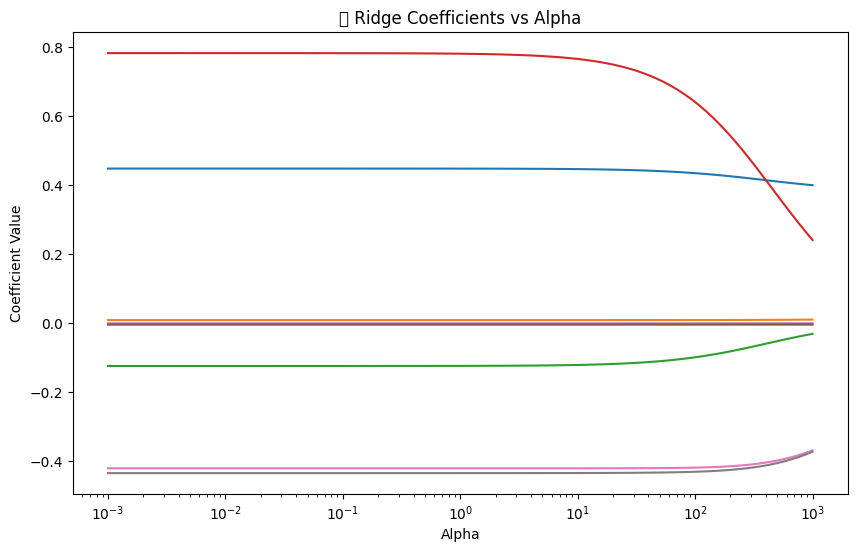

In [8]:

# Step 9: Plot Coefficient Shrinkage with Alpha
alphas_plot = np.logspace(-3, 3, 100)
coefs = []

for a in alphas_plot:
    ridge_plot = Ridge(alpha=a)
    ridge_plot.fit(X_train, y_train)
    coefs.append(ridge_plot.coef_)

plt.figure(figsize=(10,6))
plt.plot(alphas_plot, coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('📉 Ridge Coefficients vs Alpha')
plt.show()
